In [7]:
%reset -f

#%matplotlib inline 
#%load_ext autoreload
%autoreload 2

import sys
from collections import OrderedDict
import numpy as np
import pandas as pd

import mstat
from mstat.indexes import FullIndex, MatchingStatistics

#s = 'bcdbaecdcd'
s = open('../../fast_ms/tests/m.s').read().strip()[::1]
t = open('../../fast_ms/tests/input/rnd_200_128.t').read().strip()

#s = open('ssss').read().strip()[::-1]
#t = open('tttt').read().strip()

s_index = FullIndex(s[::1])
#"".join(s_index.tabs[FullIndex.FWD].BWT.values)
s

t = 'abbaba'
dd = MatchingStatistics.ms_table(t, s); #dd['_runs'] = wrong_runs
dd

,t_i,MS,nzeros,ms,runs
i,,,,,
-1,,1,0,,-1
0,a,2,2,001,0
1,b,1,0,1,1
2,b,3,3,0001,0
3,a,3,1,01,0
4,b,2,0,1,1
5,a,1,0,1,1


In [72]:
dd = pd.DataFrame([_ for _ in FullIndex(s[::-1]).maxrep_iter() if _[3] is False], 
                  columns = ["s_idx", "s", "sa_idx", "maximal"])
dd

,s_idx,s,sa_idx,maximal
0,"(1, 2)",c,"(8, 11)",False
1,"(3, 4)",c,"(8, 11)",False
2,"(3, 5)",cb,"(9, 11)",False
3,"(8, 9)",c,"(8, 11)",False
4,"(8, 10)",cb,"(9, 11)",False


In [73]:
#ms_table(t, s)#[50:80]
s_index.tabs[FullIndex.FWD]

,s_i,BWT,SA,suff_SA
i,,,,
0,b,a,11,#
1,c,c,10,a#
2,a,c,3,ababcaca#
3,b,b,5,abcaca#
4,a,c,8,aca#
5,b,a,4,babcaca#
6,c,#,1,bcababcaca#
7,a,a,6,bcaca#
8,c,a,9,ca#


In [74]:
s_index.tabs[FullIndex.REV]

,s_i,BWT,SA,suff_SA
i,,,,
0,a,b,11,#
1,c,b,6,abacb#
2,a,#,1,acacbabacb#
3,c,b,8,acb#
4,b,c,3,acbabacb#
5,a,c,10,b#
6,b,c,5,babacb#
7,a,a,7,bacb#
8,c,a,2,cacbabacb#


In [75]:
                             # 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
                             # 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
#wrong_runs = [-1] + map(int, "0 1 1 1 1 1 1 1 1 1 1 1 1 1 1".split())
#print len(wrong_runs), wrong_runs

t = 'abbaba'
dd = MatchingStatistics.ms_table(t, s); #dd['_runs'] = wrong_runs
dd

TypeError: can only concatenate list (not "range") to list

# Repeat text with uniform length repeats

[28]


/Users/denas/arch/Darwin_x86_64/lib/python/site-packages/ipykernel/__main__.py:36: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


Counter({3: 3, 11: 1, 13: 1, 23: 1, 24: 2})

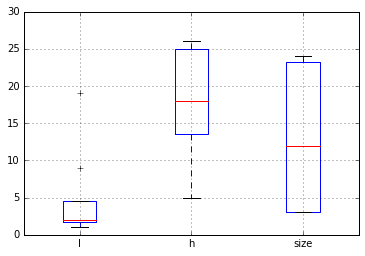

In [6]:
import random
import numpy as np
import pandas as pd


def dump_str(L, seed_pool):
    char_dumped = 0 
    while char_dumped < L:
        seed_str = random.choice(seed_pool)
        n = len(seed_str)

        repeat_length = random.choice(xrange(n))
        repeat_start_position = random.choice(xrange(n - repeat_length))
        assert repeat_length + repeat_start_position <= n
        
        to_write = seed_str[repeat_start_position:(repeat_start_position + repeat_length)]
        char_dumped += len(to_write)
        yield (repeat_start_position, (repeat_start_position + repeat_length))

def _repeat_input_type((t_path, t_len), (s_path, s_len), source,
                       seed_len, seed_nr):
    seed_pool = []
    for seed_idx in range(seed_nr):
        current_seed = "".join([random.choice(source) for i in range(seed_len)])
        seed_pool.append(current_seed)

    with open(t_path, 'w') as fd: 
        dump_str(fd, t_len)
    with open(s_path, 'w') as fd: 
        dump_str(fd, s_len)

seed_pool = ['ababababbababbabababababaaaa']
print map(len, seed_pool)
d = pd.DataFrame(data = list(dump_str(100, seed_pool)), columns = ['l', 'h'])
d['size'] = (d.h - d.l)
d.boxplot()

from collections import Counter
Counter(d['size'].tolist())

# stats of input strings

In [8]:
import sys
sys.path.append('../')
from os import path

from utils import MsInput

inp = MsInput.basedir_form('./big_paper2/', 'rep_100000000s_dis_500000t_abcd_sim1000')


'./big_paper2/rep_100000000s_dis_500000t_abcd_sim1000.s'

In [6]:
inp

msinput_pair(s_path='./big_paper2/./rep_100000000s_dis_500000t_abcd_sim1000.s', t_path='./big_paper2/./rep_100000000s_dis_500000t_abcd_sim1000.t')